# 簡單文字雲示範

In [ ]:
import nltk
from wordcloud import WordCloud

text = open('data/example.txt', 'r', encoding='utf-8').read() #匯資料
text = ' '.join(nltk.word_tokenize(text)) #斷詞依據
cloud = WordCloud().generate(text) #形成文字雲
cloud.to_file('img/output.png')

![title](img/output.png)

## 粉專文字雲比較
先匯入套件並整理資料

In [20]:
import pandas as pd
import jieba

df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位

df_blue_New = df[df['Page_Name']=='中國國民黨 KMT'][['Message']] 
df_green_New = df[df['Page_Name']=='民主進步黨'][['Message']] 

df_blue_New = df_blue_New.dropna()
df_green_New = df_green_New.dropna()

定義待會要用到的停用字字典還有自定義字典

In [21]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  

def seg_sentence(sentence):  
    jieba.load_userdict("dict/user.txt")
    sentence_seged = jieba.cut(sentence)  
    stopwords = stopwordslist('dict/stop_words.txt') 
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t':  
                outstr += word  
                outstr += ' ' 
    return outstr  

def not_load_dict(sentence):
    sentence_seged = jieba.cut(sentence)  
    outstr = ''  
    for word in sentence_seged:  
        outstr += word  
        outstr += ' ' 
    return outstr  

def get_list(df):
    index_ = list(df.index)
    word_list =''
    for i in index_:
        word_list += df['Message'][i]
    
    return word_list

### 國民黨的文字雲

In [22]:
#呼叫上面的函式進行斷詞
word_list = get_list(df_blue_New)
test = seg_sentence(word_list)

In [23]:
#畫出文字雲
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = 'D:/coding_resource/fourth_grade/politic_python/code/1_temp/code_mine/406_code/dict/simfang.ttf'
sns.set(rc={'figure.figsize':(10,6)})
my_wordcloud = WordCloud(background_color="white", scale=4, font_path=font,
                         max_words = 100,max_font_size = 60,random_state=20).generate(test)
my_wordcloud.to_file('img/blue_cloud.jpg')

![title](img/blue_cloud.jpg)

### 民進黨的文字雲

In [24]:
word_list = get_list(df_green_New)
test = seg_sentence(word_list)

sns.set(rc={'figure.figsize':(10,6)})
my_wordcloud = WordCloud(background_color="white", scale=4, font_path=font,
                         max_words = 100,max_font_size = 60,random_state=20).generate(test)
my_wordcloud.to_file('img/green_cloud.jpg')
# plt.imshow(my_wordcloud)
# plt.axis("off")
# plt.show()

![title](img/green_cloud.jpg)

## 共線圖

In [20]:
import pandas as pd
import jieba
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位

df_blue_New = df[df['Page_Name']=='中國國民黨 KMT'][['Message','Post_Date']] #只要國民黨的文章和時間
df_terms = df_blue_New

In [21]:
#設定停用字
stopWords = []
with open('dict/stop_words.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)
        
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [22]:
#設定自訂字典
with open('dict/user.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

In [23]:
#開始斷詞並載入常用字與停用字字典
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['Message'])):
    try:
        poss = jieba.cut(df_terms['Message'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 25]

In [24]:
#形成co-occurance矩陣
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

KeyboardInterrupt: 

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 127484 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 127481 missing from current font.
  font.load_char(ord(s), flags=flags)


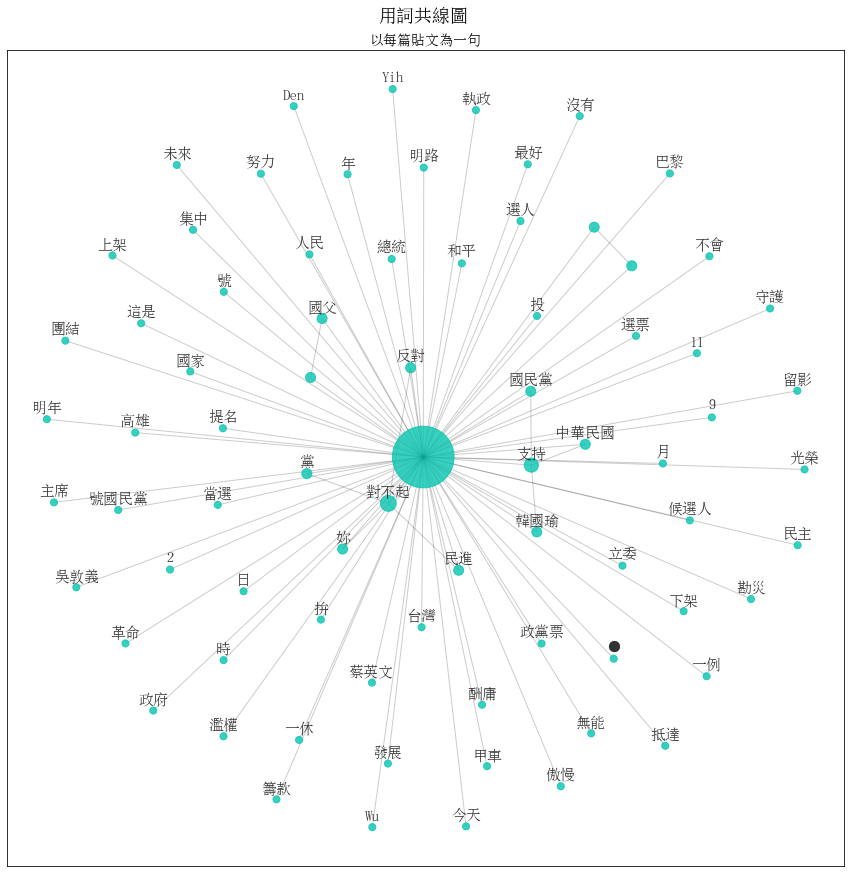

In [15]:
#準備畫出關聯圖    
plt.figure(figsize=(15,15))

plt.rcParams['font.sans-serif']=['simsun']
plt.rcParams['font.family']='sans-serif'

g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每篇貼文為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()